In [2]:
import pandas as pd
url = 'https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/diabetes.csv'
dfs = pd.read_html(url)
dfs

[     Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
 0           NaN            6      148             72             35        0   
 1           NaN            1       85             66             29        0   
 2           NaN            8      183             64              0        0   
 3           NaN            1       89             66             23       94   
 4           NaN            0      137             40             35      168   
 ..          ...          ...      ...            ...            ...      ...   
 763         NaN           10      101             76             48      180   
 764         NaN            2      122             70             27        0   
 765         NaN            5      121             72             23      112   
 766         NaN            1      126             60              0        0   
 767         NaN            1       93             70             31        0   
 
       BMI  DiabetesPedigr

In [85]:
#把datafram调出来
for i,df in enumerate(dfs):
    print('第{0}个dataframe'.format(i),'\n',df)


第0个dataframe 
      Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           NaN            6      148             72             35        0   
1           NaN            1       85             66             29        0   
2           NaN            8      183             64              0        0   
3           NaN            1       89             66             23       94   
4           NaN            0      137             40             35      168   
..          ...          ...      ...            ...            ...      ...   
763         NaN           10      101             76             48      180   
764         NaN            2      122             70             27        0   
765         NaN            5      121             72             23      112   
766         NaN            1      126             60              0        0   
767         NaN            1       93             70             31        0   

      BMI  DiabetesPedig

In [59]:
#查看表信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Unnamed: 0                  0 non-null float64
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(3), int64(7)
memory usage: 60.1 KB


In [5]:
#Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],dtype='object')
#特征（怀孕次数，血糖，血压，皮脂厚度，胰岛素，BMI身体质量指数，糖尿病遗传函数，年龄，结果）

In [6]:
#选数据
df_01 = df[['Glucose','BMI']]
glucose = df_01['Glucose']
bmi = df_01['BMI']

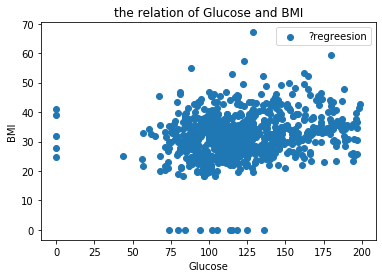

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(glucose,bmi,label='?regreesion')
ax1.set_title('the relation of Glucose and BMI')
ax1.set_xlabel('Glucose')
ax1.set_ylabel('BMI')
ax1.legend(loc='best')
ax1

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train_glucose = [[i] for i in glucose][1:500]#血糖
train_bmi = [[x] for x in bmi][1:500]#身体质量指数
model.fit(train_glucose,train_bmi)#训练集数据放入模型中
print(model.predict(np.array([149]).reshape(-1,1)))

[[33.6308155]]


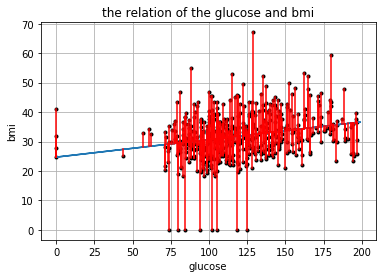

In [54]:
#使用测试数据整体对该模型进行预测
test_glucose = [[i] for i in glucose][500:768]
predict_bmi = model.predict(test_glucose) 
plt.plot(train_glucose,train_bmi,'k.')
plt.plot(test_glucose,predict_bmi)
#残差预测值
yr = model.predict(train_glucose)
for idx,x in enumerate(train_glucose):
    plt.plot([x,x],[train_bmi[idx],yr[idx]],'r-')
plt.grid(True)
plt.xlabel('glucose')
plt.ylabel('bmi')
plt.title('the relation of the glucose and bmi')
plt.show()

In [77]:
test_bmi = [[i] for i in glucose][500:768]
r2 = model.score(test_glucose,test_bmi)
print('R^2 = %.2f'%r2)
print('Coefficients=\n %.2f'%(model.coef_))

R^2 = -5.75
Coefficients=
 0.10


In [78]:
#(1)导入模型。调用逻辑回归LinearRegression()函数
#(2)fit()训练。调用fit(x,y)的方法来训练模型，其中x为数据的属性，y为所属类型。
#predict()预测。利用训练得到的模型对数据集进行预测，返回预测结果。

In [79]:
#导入模型
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
model = LinearRegression()
train_Pregnancies = [[i] for i in df['Pregnancies']][1:500]#怀孕次数
test_Pregnancies = [[i] for i in df['Pregnancies']][501:768]
train_bmi = [[i] for i in df['BMI']][1:500]

In [80]:
model.fit(train_Pregnancies,train_bmi)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
print('Coefficients:\n',model.coef_)

Coefficients:
 [[0.10483751]]


In [82]:
print('Coefficient of determination: %.2f'% model.score(train_Pregnancies,train_bmi))

Coefficient of determination: 0.00
